### 3.3.3 QuantileTransformer와 PowerTransformer
- Quantile Transformer: 1000개의 분위(quantile)를 사용하여 데이터를 균등하게 분포시킨다
  > RobustScaler와 유사

In [4]:
%pip install preamble

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

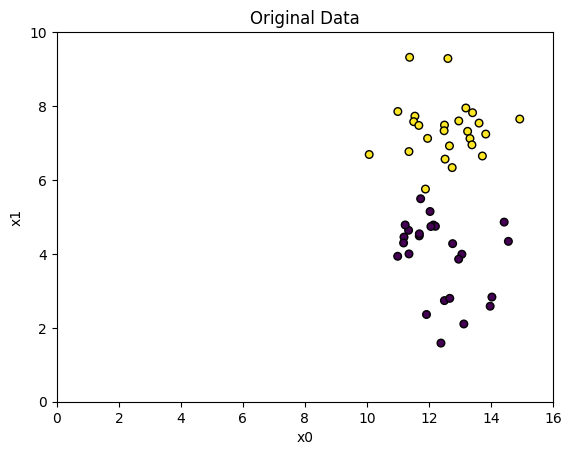

In [6]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

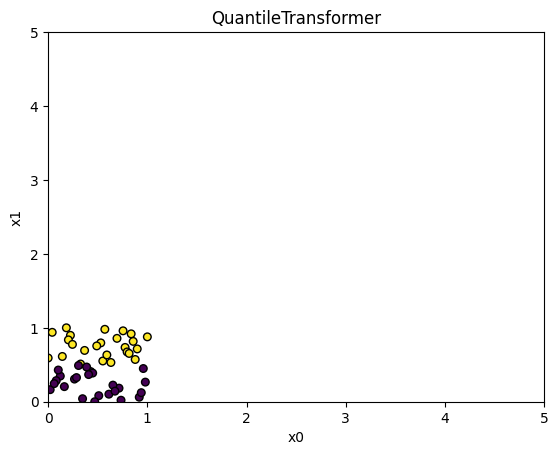

In [ ]:
scaler = QuantileTransformer(n_quantiles=50) #분위 수는 n_quantiles 매개변수로 설정, default 값은 1000
X_trans = scaler.fit_transform(X) # 특성 2개의 값이 0 ~ 1 분포

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

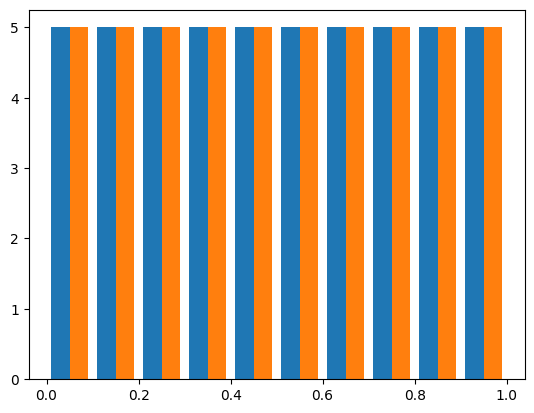

In [ ]:
plt.hist(X_trans) # 히스토그램에서 균등 분포
plt.show()

In [10]:
print(scaler.quantiles_.shape) # scaler 객체의 quantiles_ 속성에는 특성별로 계산된 분위 값이 저장

(50, 2)


In [14]:
x = np.array([[0], [5], [4],[3], [8], [9], [8],[5], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100])) # 두번째 매개변수로 지정한 분위에 해당하는 샘플을 추출

[ 0.  4.  5.  8. 10.]


In [ ]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100])) #x_trans로 변환후에 백분위

[0.   0.25 0.5  0.75 1.  ]


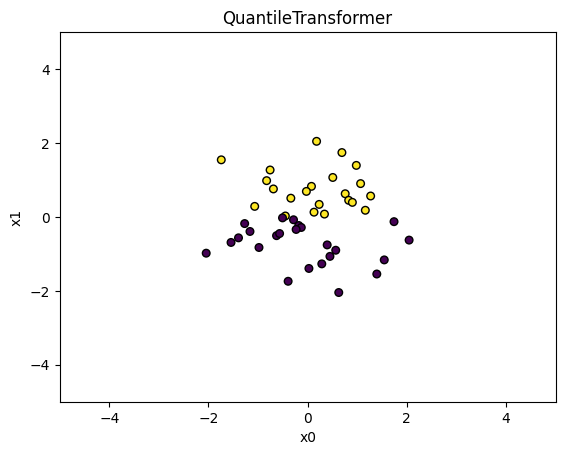

In [17]:
scaler = QuantileTransformer(n_quantiles=50, output_distribution='normal') # 매개변수 normal 사용 > 정규 분포로 변경 
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

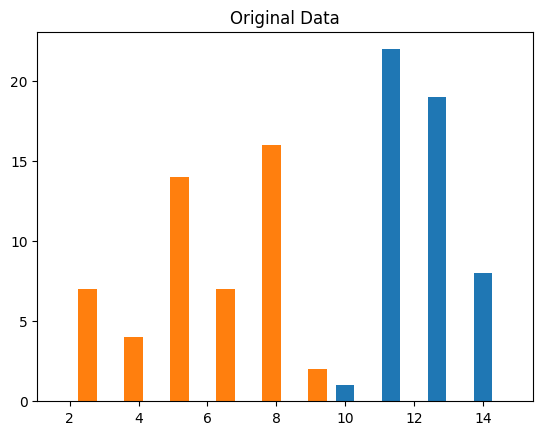

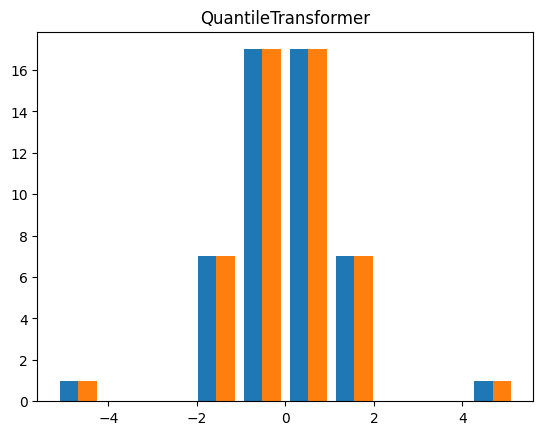

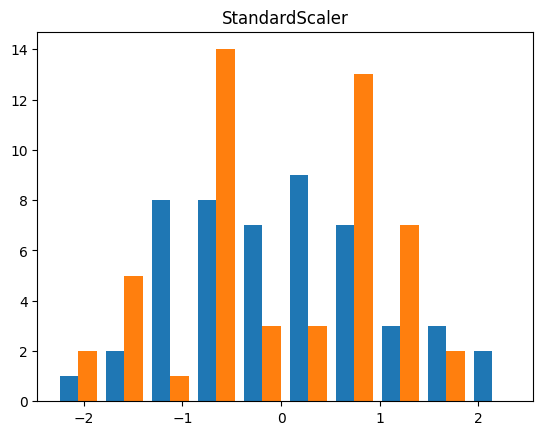

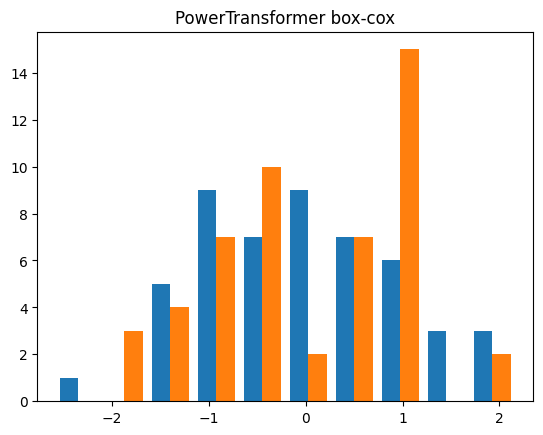

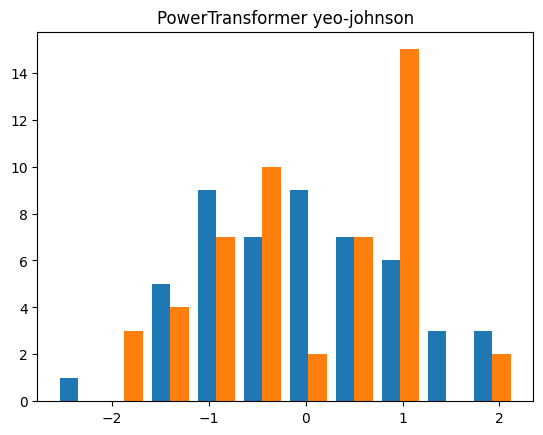

In [ ]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(n_quantiles=50, output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)# 데이터 특성별로 정규분포 형태로 변환 
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X) #
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()